In [1]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/ggpubr")

Loading required package: devtools
from URL https://api.github.com/repos/kassambara/ggpubr/zipball/master
Installing ggpubr
Installing 1 package: polynom
Installing package into 'C:/Users/pedro/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'polynom' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pedro\AppData\Local\Temp\RtmpkXyCeD\downloaded_packages


"C:/Users/pedro/Anaconda3/lib/R/bin/x64/R" --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  "C:/Users/pedro/AppData/Local/Temp/RtmpkXyCeD/devtoolsb08cd5609/kassambara-ggpubr-adae314"  \
  --library="C:/Users/pedro/Documents/R/win-library/3.4" --install-tests 



In [5]:
install.packages("ggpubr", dependencies=TRUE)

Installing package into 'C:/Users/pedro/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'ggpubr' is in use and will not be installed"

In [3]:
library("ggpubr")

Loading required package: ggplot2
Loading required package: magrittr


In [11]:
my_data<-read.csv("3Regressao.csv", header = TRUE, sep = ";")
print(my_data)

   Viscosidade..Cp. Temperatura
1          2.394955    112.0000
2          2.390956    119.4118
3          2.274826    121.0928
4          2.248343    122.0000
5          2.126766    125.0000
6          2.124524    130.0000
7          2.119584    133.6053
8          2.097782    134.0000
9          2.081570    135.5981
10         2.071519    140.0000
11         2.041287    146.5435
12         2.040921    148.0000
13         2.032034    148.2451
14         2.016654    150.0000
15         2.014428    150.0000
16         2.009603    151.8322
17         2.000131    153.0000
18         1.992350    154.1953
19         1.963628    154.5266
20         1.942853    157.3933
21         1.942789    163.0000
22         1.933672    165.3259
23         1.882910    168.2294
24         1.866273    168.4409
25         1.826302    172.0000
26         1.809837    174.8355
27         1.809119    176.7869
28         1.745198    180.9119
29         1.734898    180.9837
30         1.734249    185.0287
31      

In [12]:
y<-my_data[, c(1)]

In [13]:
x<-my_data[, c(2)]

In [15]:
cor(x, y, method = c("pearson"))

[1] -0.9889939

In [16]:
cor(x, y, method = c( "kendall"))

[1] -0.9961278

In [17]:
cor(x, y, method = c("spearman"))

[1] -0.9996299

In [18]:
cor.test(x, y, method=c("pearson"))


	Pearson's product-moment correlation

data:  x and y
t = -44.339, df = 44, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9939313 -0.9800796
sample estimates:
       cor 
-0.9889939 


In [19]:
cor.test(x, y, method=c("kendall"))

Warning message in cor.test.default(x, y, method = c("kendall")):
"Cannot compute exact p-value with ties"


	Kendall's rank correlation tau

data:  x and y
z = -9.7284, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.9961278 


In [20]:
cor.test(x, y, method=c("spearman"))

Warning message in cor.test.default(x, y, method = c("spearman")):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  x and y
S = 32424, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.9996299 


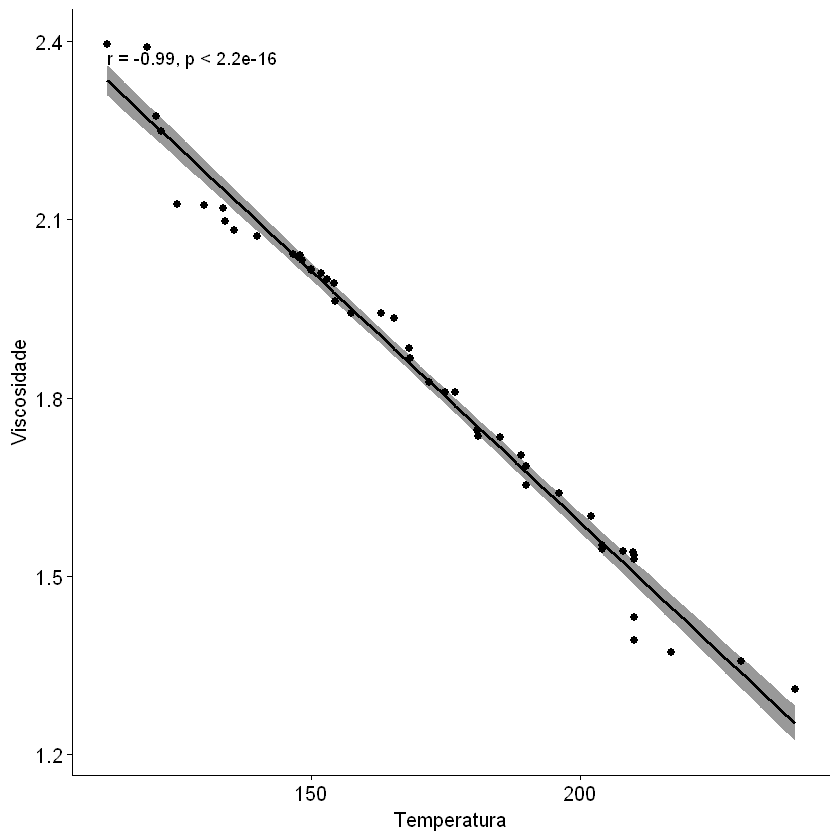

In [25]:
ggscatter(my_data, x = "Temperatura", y = "Viscosidade..Cp.", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Temperatura", ylab = "Viscosidade")

In [27]:
fit <- lm(y ~ x, data=my_data)
summary(fit) # show results


Call:
lm(formula = y ~ x, data = my_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.114280 -0.011306  0.007545  0.019942  0.118857 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.2817569  0.0330934   99.17   <2e-16 ***
x           -0.0084553  0.0001907  -44.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04198 on 44 degrees of freedom
Multiple R-squared:  0.9781,	Adjusted R-squared:  0.9776 
F-statistic:  1966 on 1 and 44 DF,  p-value: < 2.2e-16


In [28]:
coefficients(fit) # model coefficients

(Intercept)            x 
 3.281756877 -0.008455268

In [29]:
confint(fit, level=0.95) # CIs for model parameters 

,2.5 %,97.5 %
(Intercept),3.21506154,3.348452213
x,-0.00883959,-0.008070945


In [30]:
fitted(fit) # predicted values

1        2        3        4        5        6        7        8 
2.334767 2.272099 2.257885 2.250214 2.224848 2.182572 2.152088 2.148751 
       9       10       11       12       13       14       15       16 
2.135239 2.098019 2.042692 2.030377 2.028305 2.013467 2.013467 1.997975 
      17       18       19       20       21       22       23       24 
1.988101 1.977995 1.975193 1.950954 1.903548 1.883883 1.859332 1.857544 
      25       26       27       28       29       30       31       32 
1.827451 1.803476 1.786976 1.752099 1.751491 1.717290 1.683711 1.675256 
      33       34       35       36       37       38       39       40 
1.675256 1.624524 1.573793 1.556103 1.555794 1.522950 1.508026 1.506151 
      41       42       43       44       45       46 
1.506151 1.506151 1.506151 1.446964 1.337045 1.252493

In [31]:
residuals(fit) # residuals

1            2            3            4            5            6 
 0.060187947  0.118857234  0.016941183 -0.001871390 -0.098082184 -0.058047621 
           7            8            9           10           11           12 
-0.032504429 -0.050968807 -0.053668846 -0.026499985 -0.001405207  0.010544165 
          13           14           15           16           17           18 
 0.003728378  0.003187071  0.000961483  0.011628212  0.012029598  0.014355259 
          19           20           21           22           23           24 
-0.011565385 -0.008101592  0.039240246  0.049789234  0.023578437  0.008728423 
          25           26           27           28           29           30 
-0.001149054  0.006360787  0.022142545 -0.006900548 -0.016592803  0.016958623 
          31           32           33           34           35           36 
 0.020254966  0.009152482 -0.021997520  0.014672878  0.026369377 -0.004723713 
          37           38           39           40           41           42 
-0.010528335  0.019002806  0.032361845  0.029542604  0.021713570 -0.075110897 
          43           44           45           46 
-0.114279574 -0.074414904  0.018935311  0.057188132

In [32]:
anova(fit) # anova table 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,3.46391593,3.463915930,1965.946,3.700363e-38
Residuals,44,0.07752619,0.001761959,NA,NA


In [36]:
my_data<-read.csv("3RegressaoMultipla.csv", header = TRUE, sep = ";")
print(my_data)

   Vendedor Vendas Anos Score.Intelig
1         1      9    6             3
2         2      6    5             2
3         3      4    3             2
4         4      3    1             1
5         5      3    4             1
6         6      5    3             3
7         7      8    6             3
8         8      2    2             1
9         9      7    4             2
10       10      4    2             2


In [37]:
y<-my_data[, c(2)]

In [38]:
x1<-my_data[, c(3)]

In [42]:
x2<-my_data[, c(4)]

In [43]:
fit <- lm(y ~ x1 + x2, data = my_data)
summary(fit) # show results


Call:
lm(formula = y ~ x1 + x2, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0593 -0.6314 -0.1864  0.6017  1.6017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.2627     0.9374  -0.280   0.7874  
x1            0.7458     0.2607   2.861   0.0243 *
x2            1.3390     0.5468   2.449   0.0442 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.034 on 7 degrees of freedom
Multiple R-squared:  0.847,	Adjusted R-squared:  0.8033 
F-statistic: 19.37 on 2 and 7 DF,  p-value: 0.001402


In [44]:
coefficients(fit) # model coefficients

(Intercept)          x1          x2 
 -0.2627119   0.7457627   1.3389831

In [45]:
confint(fit, level=0.95) # CIs for model parameters

,2.5 %,97.5 %
(Intercept),-2.47936291,1.953939
x1,0.12939186,1.362134
x2,0.04607264,2.631893


In [46]:
fitted(fit) # predicted values

1        2        3        4        5        6        7        8 
8.228814 6.144068 4.652542 1.822034 4.059322 5.991525 8.228814 2.567797 
       9       10 
5.398305 3.906780

In [47]:
residuals(fit) # residuals

1           2           3           4           5           6 
 0.77118644 -0.14406780 -0.65254237  1.17796610 -1.05932203 -0.99152542 
          7           8           9          10 
-0.22881356 -0.56779661  1.60169492  0.09322034

In [48]:
anova(fit) # anova table 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x1,1,35.006061,35.006061,32.746326,0.00071851
x2,1,6.410889,6.410889,5.997049,0.04417930
Residuals,7,7.483051,1.069007,NA,NA


In [49]:
my_data<-read.csv("3OneSampleT.csv", header = TRUE, sep = ";")
print(my_data)

   Tempo.de.Entrega..Dias.
1                 2.642661
2                 2.303703
3                 2.336593
4                 2.792303
5                 3.012152
6                 3.084668
7                 2.792402
8                 2.204737
9                 3.090634
10                2.267621
11                2.919537
12                1.982752
13                3.020704
14                2.153841
15                2.981796
16                2.587862
17                2.642236
18                1.958647
19                1.962052
20                2.096059
21                2.809824
22                2.855840
23                3.092852
24                2.472411
25                2.713446
26                2.534773
27                2.544732
28                2.477604
29                2.201561
30                1.999305


In [52]:
t.test(my_data, mu=3)


	One Sample t-test

data:  my_data
t = -6.557, df = 29, p-value = 3.498e-07
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 2.411182 2.691171
sample estimates:
mean of x 
 2.551177 
